## 1. Scala's real-world project repository data
<p>With almost 30k commits and a history spanning over ten years, Scala is a mature programming language. It is a general-purpose programming language that has recently become another prominent language for data scientists.</p>
<p>Scala is also an open source project. Open source projects have the advantage that their entire development histories -- who made changes, what was changed, code reviews, etc. -- are publicly available. </p>
<strong><p>We're going to read in, clean up, and visualize the real world project repository of Scala that spans data from a version control system (Git) as well as a project hosting site (GitHub). We will find out who has had the most influence on its development and who are the experts.</p></strong>
<p>The dataset we will use, which has been previously mined and extracted from GitHub, is comprised of three files:</p>
<ol>
<li><code>pulls_2011-2013.csv</code> contains the basic information about the pull requests, and spans from the end of 2011 up to (but not including) 2014.</li>
<li><code>pulls_2014-2018.csv</code> contains identical information, and spans from 2014 up to 2018.</li>
<li><code>pull_files.csv</code> contains the files that were modified by each pull request.</li>
</ol>

#### Task 1: Instructions
Import the dataset into the notebook. All the relevant files can be found in the datasets subfolder.

In [88]:
# Importing pandas
# ... YOUR CODE FOR TASK 1 ...

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Loading in the data
pulls_one = pd.read_csv("datasets/Scala/pulls_2011-2013.csv")
pulls_two = pd.read_csv("datasets/Scala/pulls_2014-2018.csv")
pull_files = pd.read_csv("datasets/Scala/pull_files.csv") 

print(pulls_one, "\n\n")
print(pulls_two, "\n\n")


           pid         user                  date
0     11166973  VladimirNik  2013-12-31T23:10:55Z
1     11161892      Ichoran  2013-12-31T16:55:47Z
2     11153894      Ichoran  2013-12-31T02:41:13Z
3     11151917      rklaehn  2013-12-30T23:45:47Z
4     11131244        qerub  2013-12-29T17:21:01Z
...        ...          ...                   ...
3291    547941      xeno-by  2011-12-01T16:16:42Z
3292    547354      szeiger  2011-12-01T14:03:23Z
3293    547150      odersky  2011-12-01T12:39:40Z
3294    547003      robinst  2011-12-01T11:42:26Z
3295    546847      odersky  2011-12-01T10:41:01Z

[3296 rows x 3 columns] 


            pid       user                  date
0     163314316     hrhino  2018-01-16T23:29:16Z
1     163061502   joroKr21  2018-01-15T23:44:52Z
2     163057333  mkeskells  2018-01-15T23:05:06Z
3     162985594      lrytz  2018-01-15T15:52:39Z
4     162838837  zuvizudar  2018-01-14T19:16:16Z
...         ...        ...                   ...
2899   11244241     folone  2

## 2. Preparing and cleaning the data
<p>First, we will need to combine the data from the two separate pull DataFrames. </p>
<p>Next, the raw data extracted from GitHub contains dates in the ISO8601 format. However, <code>pandas</code> imports them as regular strings. To make our analysis easier, we need to convert the strings into Python's <code>DateTime</code> objects. <code>DateTime</code> objects have the important property that they can be compared and sorted.</p>
<p>The pull request times are all in UTC (also known as Coordinated Universal Time). The commit times, however, are in the local time of the author with time zone information (number of hours difference from UTC). To make comparisons easy, we should convert all times to UTC.</p>

#### Task 2: Instructions
Combine the two pulls DataFrames and then convert date to a DateTime object.

Append pulls_one to pulls_two and assign the result to pulls.
Convert the date column for the pulls object from a string into a DateTime object.
For the conversion, we recommend using pandas' to_datetime() function. Set the utc parameter to True, as this will simplify future operations.

Coordinated Universal Time (UTC) is the basis for civil time today. This 24-hour time standard is kept using highly precise atomic clocks combined with the Earth's rotation.

In [89]:
# Append pulls_one to pulls_two
pulls = pulls_one.append(pulls_two) #3296 + 2904 = 6200
print(pulls, "\n\n") 

# Convert the date for the pulls object
pulls['date'] = pd.to_datetime(pulls["date"]) #date changes to UTC version
print(pulls['date'])

           pid         user                  date
0     11166973  VladimirNik  2013-12-31T23:10:55Z
1     11161892      Ichoran  2013-12-31T16:55:47Z
2     11153894      Ichoran  2013-12-31T02:41:13Z
3     11151917      rklaehn  2013-12-30T23:45:47Z
4     11131244        qerub  2013-12-29T17:21:01Z
...        ...          ...                   ...
2899  11244241       folone  2014-01-06T09:07:34Z
2900  11240674     clhodapp  2014-01-06T03:52:23Z
2901  11234757      xeno-by  2014-01-05T12:23:24Z
2902  11231462      rklaehn  2014-01-04T22:42:02Z
2903  11188295      rklaehn  2014-01-02T18:55:33Z

[6200 rows x 3 columns] 


0      2013-12-31 23:10:55+00:00
1      2013-12-31 16:55:47+00:00
2      2013-12-31 02:41:13+00:00
3      2013-12-30 23:45:47+00:00
4      2013-12-29 17:21:01+00:00
                  ...           
2899   2014-01-06 09:07:34+00:00
2900   2014-01-06 03:52:23+00:00
2901   2014-01-05 12:23:24+00:00
2902   2014-01-04 22:42:02+00:00
2903   2014-01-02 18:55:33+00:00
Name: dat

## 3. Merging the DataFrames
<p>The data extracted comes in two separate files. Merging the two DataFrames will make it easier for us to analyze the data in the future tasks.</p>

#### Task 3: Instructions
Merge the two DataFrames.

Merge pulls and pull_files on the pid column. Assign the result to the data variable.
The pandas DataFrame has a merge method that will perform the joining of two DataFrames on a common field.

In [90]:
# Merge the two DataFrames
data = pulls.merge(pull_files, on ="pid")
data

,pid,user,date,file
0,11166973,VladimirNik,2013-12-31 23:10:55+00:00,src/reflect/scala/reflect/api/Printers.scala
1,11166973,VladimirNik,2013-12-31 23:10:55+00:00,src/reflect/scala/reflect/internal/Printers.scala
2,11166973,VladimirNik,2013-12-31 23:10:55+00:00,test/files/run/reify_ann3.check
3,11166973,VladimirNik,2013-12-31 23:10:55+00:00,test/junit/scala/reflect/internal/PrintersTest...
4,11161892,Ichoran,2013-12-31 16:55:47+00:00,src/library/scala/collection/mutable/ArrayOps....
...,...,...,...,...
85583,11231462,rklaehn,2014-01-04 22:42:02+00:00,src/library/scala/collection/immutable/HashSet...
85584,11188295,rklaehn,2014-01-02 18:55:33+00:00,src/library/scala/collection/immutable/HashSet...
85585,11188295,rklaehn,2014-01-02 18:55:33+00:00,test/files/run/t6253a.scala
85586,11188295,rklaehn,2014-01-02 18:55:33+00:00,test/files/run/t6253b.scala


## 4. Is the project still actively maintained?
<p>The activity in an open source project is not very consistent. Some projects might be active for many years after the initial release, while others can slowly taper out into oblivion. Before committing to contributing to a project, it is important to understand the state of the project. Is development going steadily, or is there a drop? Has the project been abandoned altogether?</p>
<p>The data used in this project was collected in January of 2018. We are interested in the evolution of the number of contributions up to that date.</p>
<p>For Scala, we will do this by plotting a chart of the project's activity. We will calculate the number of pull requests submitted each (calendar) month during the project's lifetime. We will then plot these numbers to see the trend of contributions.</p>
<ul>
<li><p>A helpful reminder of how to access various components of a date can be found in <a href="https://campus.datacamp.com/courses/data-manipulation-with-pandas/slicing-and-indexing?ex=12">this exercise of Data Manipulation with pandas</a></p></li>
<li><p>Additionally, recall that you can group by multiple variables by passing a list to <code>.groupby()</code>. This video from <a href="https://campus.datacamp.com/courses/data-manipulation-with-pandas/aggregating-dataframes?ex=9">Data Manipulation with pandas</a> should help!</p></li>
</ul>

#### Task 4: Instructions
Calculate and plot project activity in terms of pull requests.

Group data by month and year (i.e. '2011-01', '2011-02', etc), and count the number pull requests (pid). Store the counts in a variable called counts.
There are a number of ways to accomplish this.
One way would be to create two new columns containing the year and month attributes of the date column, and then group by these two variables.
Plot counts using a bar chart (this has been done for you).
Note, the scaffolding exists to help you create the two columns as suggested above. However, this exercise will only check whether you create counts correctly. Thus, alternate solutions are more than welcome!

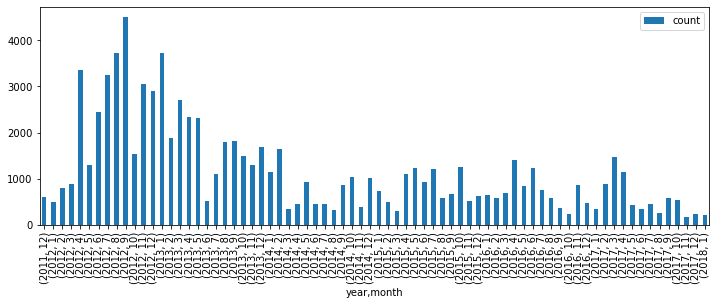

In [91]:
%matplotlib inline

# Create a column that will store the month
data['month'] = pd.DatetimeIndex(data['date']).month

# Create a column that will store the year
data['year'] = pd.DatetimeIndex(data['date']).year

# Group by the month and year and count the pull requests
counts = data.groupby(["year", "month"])["pid"].agg(['count'])

# Plot the results
counts.plot(kind='bar', figsize = (12,4))


## 5. Is there camaraderie(isbirliği, uyum) in the project?
<p>The organizational structure varies from one project to another, and it can influence your success as a contributor. A project that has a very small community might not be the best one to start working on. The small community might indicate a high barrier of entry. This can be caused by several factors, including a community that is reluctant to accept pull requests from "outsiders," that the code base is hard to work with, etc. However, a large community can serve as an indicator that the project is regularly accepting pull requests from new contributors. Such a project would be a good place to start.</p>
<p>In order to evaluate the dynamics of the community, we will plot a histogram of the number of pull requests submitted by each user. A distribution that shows that there are few people that only contribute a small number of pull requests can be used as in indicator that the project is not welcoming of new contributors. </p>

#### Task 5: Instructions
Plot pull requests by user.

Group the pull requests by each user and count the number of pull requests they submitted. Store the counts in a variable called by_user.
Plot the histogram for by_user.

user
0xmohit           2
193s              4
2m               20
4.00E+06         22
AlexeyIvanov8     2
                 ..
yinxusen          1
yllan             4
ziggystar        22
zsxwing           6
zuvizudar         1
Name: file, Length: 464, dtype: int64 




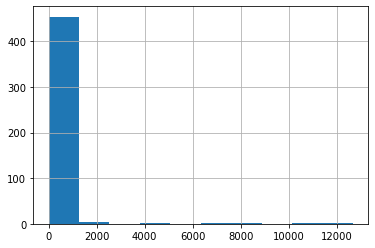

In [92]:
# Required for matplotlib
%matplotlib inline

# Group by the submitter
by_user = data.groupby(["user"])["file"].agg('count')
print(by_user, "\n\n")

# Plot the histogram
by_user.hist()

## 6. What files were changed in the last ten pull requests?
<p>Choosing the right place to make a contribution is as important as choosing the project to contribute to. Some parts of the code might be stable, some might be dead. Contributing there might not have the most impact. Therefore it is important to understand the parts of the system that have been recently changed. This allows us to pinpoint the "hot" areas of the code where most of the activity is happening. Focusing on those parts might not the most effective use of our times.</p>

#### Task 6: Instructions
Identify the files changed in the last ten pull requests.

Select the last ten pull requests and name the resulting DataFrame last_10.
Merge last_10 with the pull_files DataFrame on pid, assigning the result to joined_pr.
Identify the unique files in joined_pr (via the file column) using set().
Python's DateTime objects are comparable and sortable. A more recent date is larger than an older date. In task 2, we converted the date column into DateTime objects. Therefore, the largest ten values in the date column are the most recent ones.

pandas' nlargest method (documentation) is helpful for the first bullet.

Here is an example of using set() on Stack Overflow.

In [93]:
# Identify the last 10 pull requests
last_10 = pulls_two.nlargest(10, 'pid', keep = "last")
print(last_10, "\n")

# Join the two data sets
joined_pr = pull_files.merge(last_10, on = "pid")
print(joined_pr, "\n")

# Identify the unique files
files = set(joined_pr['file'])

# Print the results
files

         pid         user                  date
0  163314316       hrhino  2018-01-16T23:29:16Z
1  163061502     joroKr21  2018-01-15T23:44:52Z
2  163057333    mkeskells  2018-01-15T23:05:06Z
3  162985594        lrytz  2018-01-15T15:52:39Z
4  162838837    zuvizudar  2018-01-14T19:16:16Z
5  162765232  howtonotwin  2018-01-13T04:37:17Z
6  162643301       hrhino  2018-01-12T14:29:49Z
7  162256029    mkeskells  2018-01-10T23:20:03Z
8  162197834    SethTisue  2018-01-10T18:31:25Z
9  162011899     joroKr21  2018-01-10T00:45:57Z 

          pid                                               file         user  \
0   163314316                    test/files/pos/t5638/Among.java       hrhino   
1   163314316                   test/files/pos/t5638/Usage.scala       hrhino   
2   163314316                         test/files/pos/t9291.scala       hrhino   
3   163314316                         test/files/run/t8348.check       hrhino   
4   163314316              test/files/run/t8348/TableColumn.java 

{'LICENSE',
 'doc/LICENSE.md',
 'doc/License.rtf',
 'project/VersionUtil.scala',
 'src/compiler/scala/reflect/reify/phases/Calculate.scala',
 'src/compiler/scala/tools/nsc/backend/jvm/BCodeHelpers.scala',
 'src/compiler/scala/tools/nsc/backend/jvm/PostProcessor.scala',
 'src/compiler/scala/tools/nsc/backend/jvm/analysis/BackendUtils.scala',
 'src/compiler/scala/tools/nsc/profile/AsyncHelper.scala',
 'src/compiler/scala/tools/nsc/profile/Profiler.scala',
 'src/compiler/scala/tools/nsc/symtab/classfile/ClassfileParser.scala',
 'src/compiler/scala/tools/nsc/typechecker/Contexts.scala',
 'src/library/scala/Predef.scala',
 'src/library/scala/concurrent/Lock.scala',
 'src/library/scala/util/Properties.scala',
 'src/reflect/scala/reflect/internal/pickling/ByteCodecs.scala',
 'src/reflect/scala/reflect/internal/tpe/GlbLubs.scala',
 'src/scaladoc/scala/tools/nsc/doc/html/page/Entity.scala',
 'src/scalap/decoder.properties',
 'test/files/neg/leibniz-liskov.check',
 'test/files/neg/leibniz-liskov

## 7. Who made the most pull requests to a given file?
<p>When contributing to a project, we might need some guidance. We might find ourselves needing some information regarding the codebase. It is important direct any questions to the right person. Contributors to open source projects generally have other day jobs, so their time is limited. It is important to address our questions to the right people. One way to identify the right target for our inquiries is by using their contribution history.</p>
<p>We identified <code>src/compiler/scala/reflect/reify/phases/Calculate.scala</code> as being recently changed. We are interested in the top 3 developers who changed that file. Those developers are the ones most likely to have the best understanding of the code.</p>

#### Task 7: Instructions
Identify the top 3 developers that submitted pull requests to src/compiler/scala/reflect/reify/phases/Calculate.scala.

Select the pull requests that changed that file and name the resulting DataFrame file_pr.
Count the number of changes made by each developer and name the resulting DataFrame author_counts.
Print the top 3 developers.
pandas' nlargest method (documentation) is helpful for the third bullet.

In [94]:
# This is the file we are interested in:
file = 'src/compiler/scala/reflect/reify/phases/Calculate.scala'

# Identify the commits that changed the file
file_pr = data[data["file"] == file]
print(file_pr, "\n")

# Count the number of changes made by each developer
author_counts = file_pr.groupby("user").agg("count")
print(author_counts,"\n")

# Print the top 3 developers
print(author_counts.nlargest(3, 'file'))

             pid          user                      date  \
1234    10587633      retronym 2013-12-06 10:04:43+00:00   
12514    5320191           soc 2013-04-23 15:47:45+00:00   
12823    5291974  bjornregnell 2013-04-22 13:56:06+00:00   
13381    5050360      retronym 2013-04-09 06:13:57+00:00   
13779    5026775      retronym 2013-04-08 07:07:45+00:00   
14970    4786005     starblood 2013-03-25 02:48:48+00:00   
17127    4295399      retronym 2013-02-24 21:43:43+00:00   
18341    4019878           soc 2013-02-06 18:24:21+00:00   
19174    3918789  gkossakowski 2013-01-31 00:43:19+00:00   
19834    3854688        melloc 2013-01-26 22:47:32+00:00   
24668    3290864         densh 2012-12-08 15:18:04+00:00   
27074    2919907         paulp 2012-11-07 21:13:47+00:00   
28951    2721711           soc 2012-10-21 19:58:20+00:00   
35284    2089264         paulp 2012-08-17 16:15:26+00:00   
35498    2072662       xeno-by 2012-08-16 05:39:22+00:00   
35608    2071228       xeno-by 2012-08-1

In [95]:
print(data)
print()

            pid         user                      date  \
0      11166973  VladimirNik 2013-12-31 23:10:55+00:00   
1      11166973  VladimirNik 2013-12-31 23:10:55+00:00   
2      11166973  VladimirNik 2013-12-31 23:10:55+00:00   
3      11166973  VladimirNik 2013-12-31 23:10:55+00:00   
4      11161892      Ichoran 2013-12-31 16:55:47+00:00   
...         ...          ...                       ...   
85583  11231462      rklaehn 2014-01-04 22:42:02+00:00   
85584  11188295      rklaehn 2014-01-02 18:55:33+00:00   
85585  11188295      rklaehn 2014-01-02 18:55:33+00:00   
85586  11188295      rklaehn 2014-01-02 18:55:33+00:00   
85587  11188295      rklaehn 2014-01-02 18:55:33+00:00   

                                                    file  month  year  
0           src/reflect/scala/reflect/api/Printers.scala     12  2013  
1      src/reflect/scala/reflect/internal/Printers.scala     12  2013  
2                        test/files/run/reify_ann3.check     12  2013  
3      test/jun

## 8. Who made the last ten pull requests on a given file?
<p>Open source projects suffer from fluctuating membership. This makes the problem of finding the right person more challenging: the person has to be knowledgeable <em>and</em> still be involved in the project. A person that contributed a lot in the past might no longer be available (or willing) to help. To get a better understanding, we need to investigate the more recent history of that particular part of the system. </p>
<p>Like in the previous task, we will look at the history of  <code>src/compiler/scala/reflect/reify/phases/Calculate.scala</code>.</p>

#### Task 8: Instructions
Identify the most recent ten pull requests that touched src/compiler/scala/reflect/reify/phases/Calculate.scala.

Select the pull requests that touched the file and name the resulting DataFrame file_pr.
Merge file_pr with the pulls DataFrame on the pid column and name the resulting DataFrame joined_pr.
Using set(), create a set of users for the ten most recent pull requests.
To find the ten most recent pull requests, use the nlargest function of a DataFrame. Again, pandas' nlargest method (documentation) may be helpful for this third bullet.

In [96]:
file = 'src/compiler/scala/reflect/reify/phases/Calculate.scala'

# Select the pull requests that changed the target file
file_pr = pull_files[pull_files['file'] == file]
print(file_pr, "\n")

# Merge the obtained results with the pulls DataFrame
joined_pr = pulls.merge(file_pr, on='pid')
print(joined_pr, "\n")

# Find the users of the last 10 most recent pull requests
users_last_10 = set(joined_pr.nlargest(10, 'date')['user'])
print(users_last_10, "\n")


             pid                                               file
13     162838837  src/compiler/scala/reflect/reify/phases/Calcul...
26951   22845163  src/compiler/scala/reflect/reify/phases/Calcul...
32753   12102550  src/compiler/scala/reflect/reify/phases/Calcul...
35420   10587633  src/compiler/scala/reflect/reify/phases/Calcul...
46700    5320191  src/compiler/scala/reflect/reify/phases/Calcul...
47009    5291974  src/compiler/scala/reflect/reify/phases/Calcul...
47567    5050360  src/compiler/scala/reflect/reify/phases/Calcul...
47965    5026775  src/compiler/scala/reflect/reify/phases/Calcul...
49156    4786005  src/compiler/scala/reflect/reify/phases/Calcul...
51313    4295399  src/compiler/scala/reflect/reify/phases/Calcul...
52527    4019878  src/compiler/scala/reflect/reify/phases/Calcul...
53360    3918789  src/compiler/scala/reflect/reify/phases/Calcul...
54020    3854688  src/compiler/scala/reflect/reify/phases/Calcul...
58854    3290864  src/compiler/scala/reflect/rei

## 9. The pull requests of two special developers
<p>Now that we have identified two potential contacts in the projects, we need to find the person who was most involved in the project in recent times. That person is most likely to answer our questions. For each calendar year, we are interested in understanding the number of pull requests the authors submitted. This will give us a high-level image of their contribution trend to the project.</p>

#### Task 9: Instructions
Plot the number of pull requests for two developers, over time.

Using the pulls DataFrame, select all of the pull requests by these two developers and name the resulting DataFrame by_author.
Fill in the groupby parameters to count the number of pull requests submitted by each author each year. That is, group by user and the year property of date.
Plot counts_wide using a bar chart.
pandas' isin method (documentation will be helpful for bullet one.

DateTime objects expose the components of a date through their dt accessors.

counts is transformed to a wide format to make plotting the bar chart of pull request count (y-axis) by year (x-axis) by user (legend) easier.

           pid     user                      date
7     11126653  xeno-by 2013-12-28 19:39:23+00:00
9     11121557  xeno-by 2013-12-27 23:50:56+00:00
10    11121465  xeno-by 2013-12-27 23:41:05+00:00
11    11121327  xeno-by 2013-12-27 23:25:52+00:00
12    11114584  xeno-by 2013-12-27 15:51:50+00:00
...        ...      ...                       ...
2878  11385248  xeno-by 2014-01-10 00:36:25+00:00
2884  11336879  xeno-by 2014-01-08 20:10:09+00:00
2887  11329094      soc 2014-01-08 16:46:06+00:00
2894  11289742  xeno-by 2014-01-07 16:14:56+00:00
2901  11234757  xeno-by 2014-01-05 12:23:24+00:00

[715 rows x 3 columns] 

       user  date  pid
0       soc  2011   12
1       soc  2012   44
2       soc  2013  117
3       soc  2014   20
4       soc  2015   24
5       soc  2016   21
6   xeno-by  2011   20
7   xeno-by  2012  271
8   xeno-by  2013  123
9   xeno-by  2014   60
10  xeno-by  2015    3 

user  soc  xeno-by
date              
2011   12       20
2012   44      271
2013  117      123
2

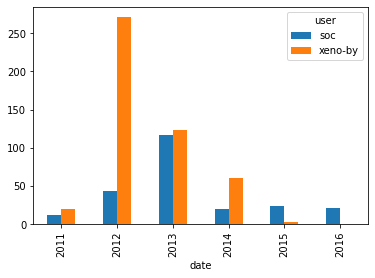

In [97]:
%matplotlib inline

# The developers we are interested in
authors = ['xeno-by', 'soc']

# Get all the developers' pull requests
by_author = pulls[pulls["user"].isin(authors)]
print(by_author, "\n")

# Count the number of pull requests submitted each year
counts = by_author.groupby(["user", by_author["date"].dt.year]).agg({'pid': 'count'}).reset_index()
print(counts, "\n")

# Convert the table to a wide format
counts_wide = counts.pivot_table(index='date', columns='user', values='pid', fill_value=0)
print(counts_wide, "\n")

# Plot the results
counts_wide.plot(kind='bar')  

## 10. Visualizing the contributions of each developer
<p>As mentioned before, it is important to make a distinction between the global expertise and contribution levels and the contribution levels at a more granular level (file, submodule, etc.) In our case, we want to see which of our two developers of interest have the most experience with the code in a given file. We will measure experience by the number of pull requests submitted that affect that file and how recent those pull requests were submitted.</p>

#### Task 10: Instructions
Calculate the number of pull requests submitted by a developer to a file each year.

Select the pull requests submitted by the authors from the data DataFrame and name the results by_author.
Select the pull requests from by_author that affect the file and name the results by_file.
Transform grouped into a wide format using pivot_table. Name the results by_file_wide.
The code required to complete bullet one in this task is the same as the code for bullet one in task 9, except on the data DataFrame instead of the pulls DataFrame.

by_file is transformed to a wide format to make plotting the bar chart of pull request count (y-axis) by year (x-axis) by user (legend) easier. The columns for by_file_wide are as follows:

Index column: date
Columns to expand: user
Value columns: pid
Fill value: 0

            pid     user                      date  \
25     11126653  xeno-by 2013-12-28 19:39:23+00:00   
26     11126653  xeno-by 2013-12-28 19:39:23+00:00   
31     11121557  xeno-by 2013-12-27 23:50:56+00:00   
32     11121557  xeno-by 2013-12-27 23:50:56+00:00   
33     11121557  xeno-by 2013-12-27 23:50:56+00:00   
...         ...      ...                       ...   
85530  11289742  xeno-by 2014-01-07 16:14:56+00:00   
85531  11289742  xeno-by 2014-01-07 16:14:56+00:00   
85532  11289742  xeno-by 2014-01-07 16:14:56+00:00   
85533  11289742  xeno-by 2014-01-07 16:14:56+00:00   
85581  11234757  xeno-by 2014-01-05 12:23:24+00:00   

                                                    file  month  year  
25      src/reflect/scala/reflect/internal/Mirrors.scala     12  2013  
26     test/junit/scala/reflect/internal/MirrorsTest....     12  2013  
31                           test/files/neg/t8104a.check     12  2013  
32                  test/files/neg/t8104a/Macros_1.scala     12

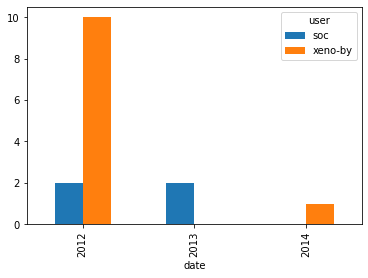

In [98]:
authors = ['xeno-by', 'soc']
file = 'src/compiler/scala/reflect/reify/phases/Calculate.scala'

# Select the pull requests submitted by the authors, from the `data` DataFrame
by_author = data[data["user"].isin(authors)]
print(by_author)

# Select the pull requests that affect the file
by_file = by_author[by_author["file"] == file]
print(by_file)

# Group and count the number of PRs done by each user each year
grouped = by_file.groupby(['user', by_file['date'].dt.year]).count()['pid'].reset_index()
print(grouped)

# Transform the data into a wide format
by_file_wide = grouped.pivot_table(index="date", columns="user", values="pid", fill_value = 0)
print(by_file_wide)

# Plot the results
by_file_wide.plot(kind='bar')